For this capstone project I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Let's first take a look basic the data

In [90]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
sns.set_style('whitegrid')
%matplotlib inline

In [92]:
CALLS = pd.read_csv('911.csv')

In [93]:
# A Look at the head of the dataframe
CALLS.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [94]:
CALLS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Basic Questions

The top 10 zipcodes for the placed 911 call

In [95]:
CALLS['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

The top 10 townships for placed 911 calls

In [96]:
CALLS['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

Number of unique title codes

In [97]:
CALLS['title'].nunique()

110

Creating new features, data cleaning and analysis

Transforming the title column into a categorized reason for the call

In [98]:
CALLS['Reason'] = CALLS['title'].apply(lambda title: title.split(':')[0])

Summarizing the reasons for 991 calls

In [99]:
CALLS['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

Basic visualiation of 911 calls by reason

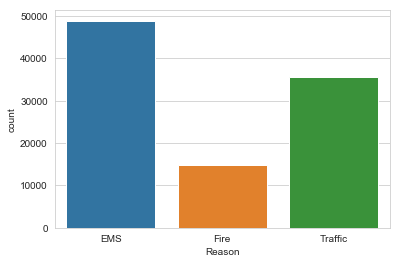

In [100]:
sns.countplot(data=CALLS,x='Reason')

In [101]:
# checking datatypes for all columns
print(CALLS.dtypes)

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
Reason        object
dtype: object


In [102]:
type(CALLS['timeStamp'].iloc[0])

str

Formatting time stamps from strings into DateTime objects

In [103]:
CALLS['timeStamp'] = pd.to_datetime(CALLS['timeStamp'])

Creating hour, month and day of week columns for 911 calls data

In [104]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [105]:
CALLS['Hour'] = CALLS['timeStamp'].apply(lambda time: time.hour)
CALLS['Month'] = CALLS['timeStamp'].apply(lambda time: time.month)
CALLS['Day of Week'] = CALLS['timeStamp'].apply(lambda time: time.dayofweek)

In [106]:
CALLS['Day of Week'] = CALLS['Day of Week'].map(dmap)

Count plot to visualize the reason for 911 calls based on days of the week

Text(0, 0.5, 'Number of Calls')

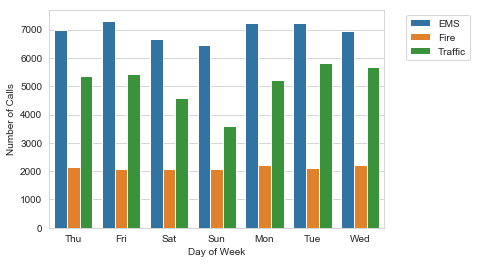

In [107]:
sns.countplot(data = CALLS,x='Day of Week',hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.ylabel('Number of Calls')

Next we will look at number of 911 calls this time based on month

In [108]:
calls_month = CALLS.groupby('Month').count()

In [109]:
# displaying count of calls per month in each category
calls_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


For the graphs below we are assuming that if the latitude was recorded then the 911 call was made, therefore we can call the iplot function right from the lat column

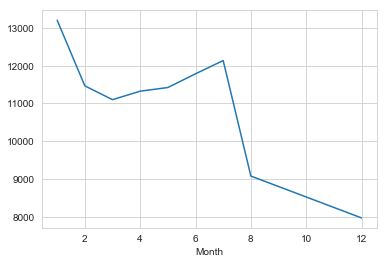

In [110]:
calls_month['lat'].plot()

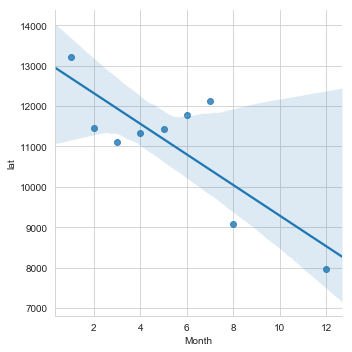

In [111]:
# linear fit on the number of calls per month
sns.lmplot(x='Month',y='lat',data=calls_month.reset_index())

Creating a date column from the timeStamp column 

In [112]:
CALLS['Date']=CALLS['timeStamp'].apply(lambda t: t.date())

Using the groupby function to create a plot of the nubmber of 911 calls by the date

In [120]:
num_calls = CALLS.groupby('Date').count()

[Text(0, 0.5, 'Number of calls')]

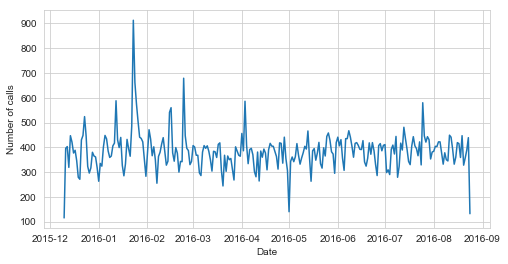

In [124]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(data=num_calls,x=num_calls.index,y='lat')
ax.set(ylabel='Number of calls')

A deeper look into 911 calls based on date with a focus on the reason for the call (Traffic, Fire and EMS)

[Text(0.5, 1.0, 'Traffic')]

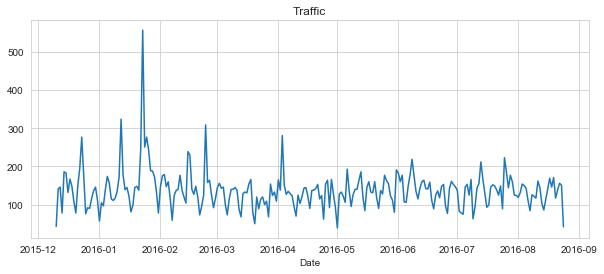

In [133]:
plt.figure(figsize=(10,4))
ax = CALLS[CALLS['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
ax.set(title='Traffic')


[Text(0.5, 1.0, 'Fire')]

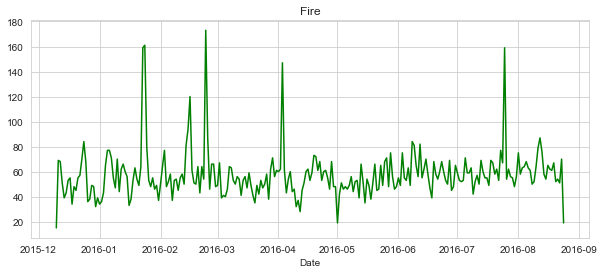

In [134]:
plt.figure(figsize=(10,4))
ax= CALLS[CALLS['Reason']=='Fire'].groupby('Date').count()['lat'].plot(color='g')
ax.set(title = 'Fire')

Text(0.5, 1.0, 'EMS')

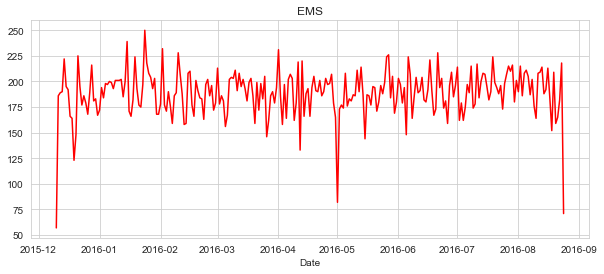

In [135]:
plt.figure(figsize=(10,4))
ax = CALLS[CALLS['Reason']=='EMS'].groupby('Date').count()['lat'].plot(color='r')
ax.set_title('EMS')

Formatting the data into a heat map to see 911 calls based on the hour and day of week

In [136]:
day_hour = CALLS.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

In [137]:
# format for heat map
day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [138]:
# This can also be done using the pivot_table method
alt_day_hour = CALLS.pivot_table(values='timeStamp', index='Day of Week',
               columns='Hour',aggfunc='count')

In [139]:
alt_day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


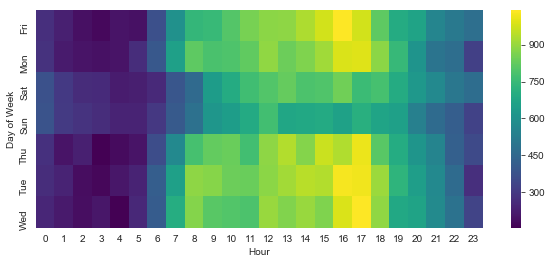

In [152]:
plt.figure(figsize=(10,4))
sns.heatmap(day_hour,cmap='viridis')

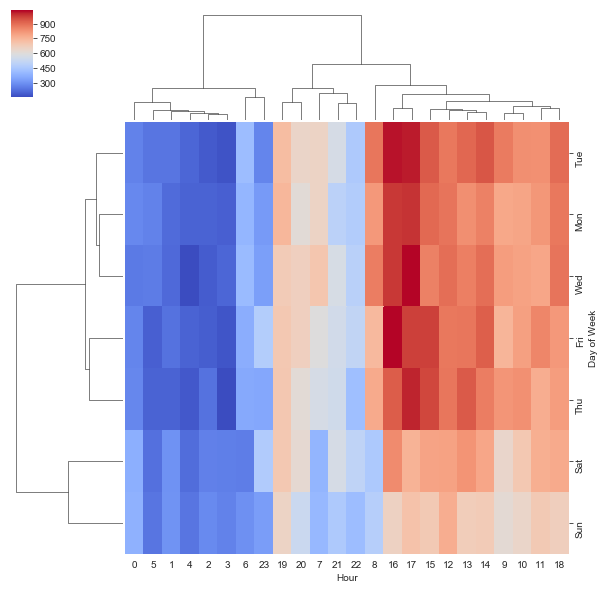

In [153]:
sns.clustermap(day_hour,cmap='coolwarm')

Now the same heat map analysis but this time with day of the week and month

In [143]:
day_month = CALLS.pivot_table(index='Day of Week',columns='Month',
              values='timeStamp', aggfunc='count')

In [146]:
day_month

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


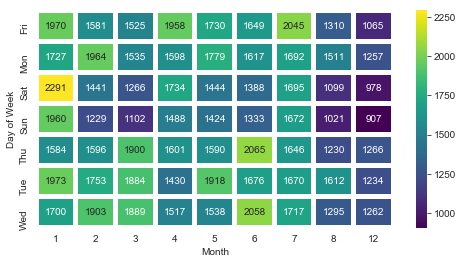

In [154]:
# This time with a smaller heat map numerical values can be displayed reasonably
plt.figure(figsize=(8,4))
sns.heatmap(day_month,linewidth=4,fmt='g',annot=True,cmap='viridis')

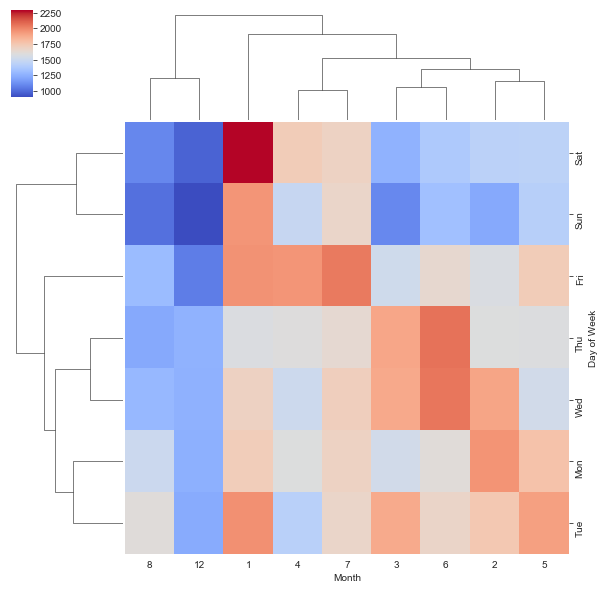

In [155]:
sns.clustermap(day_month,cmap='coolwarm')

That concludes the analaysis for the 911 calls data